# Train a JointVAE model

### Get MNIST data
Build a simple JointVAE model on MNIST

### Define latent distribution of the model

In [1]:
from utils.dataloaders import get_mnist_dataloaders, get_celeba_dataloader 
from torchvision import transforms 
from torchvision.datasets import ImageFolder 
from torch.utils.data import DataLoader 
import os 
import torch
from jointvae.models import VAE
from jointvae.training import Trainer
from torch import optim
from viz.visualize_c import Visualizer
import matplotlib.pyplot as plt
import numpy as np



valid_loader, train_loader, test_loader = get_mnist_dataloaders(batch_size=64)

# Latent distribution will be joint distribution of 10 gaussian normal distributions  7-14
# and one 10 dimensional Gumbel Softmax distribution
n_cont = 64
disc = [10]
n_disc = len(disc)
latent_spec = {'cont': n_cont,
               'disc': disc}

device = torch.device('cuda')
#model = VAE(latent_spec=latent_spec, img_size=(3, 64, 64)).cuda()
model = VAE(latent_spec=latent_spec, img_size=(1, 32, 32)).cuda()
print(model)


lr=5e-4
# Build optimizer
optimizer = optim.Adam(model.parameters(), lr=lr)
# Define the capacities
# Continuous channels
gamma=5.0
cont_capacity = [0.0, 0.0, 25000, gamma]  # Starting at a capacity of 0.0, increase this to 5.0
                                         # over 25000 iterations with a gamma of 30.0
# Discrete channels
disc_capacity = [0.0, 0.0, 25000, gamma]  # Starting at a capacity of 0.0, increase this to 5.0
                                         # over 25000 iterations with a gamma of 30.0


lambda_d = 0
lambda_od = 10*lambda_d
lambda_dis = 20*lambda_d 
path="ReportFig/PVAE/cont_{}/gamma_ {}lambda{}".format(n_cont,gamma,lambda_d)
# Build a trainer
trainer = Trainer(model, optimizer,
                  cont_capacity=cont_capacity,
                  disc_capacity=disc_capacity,lambda_d = lambda_d,
                  lambda_od = lambda_od, lambda_dis = lambda_dis )
# Build a visualizer which will be passed to trainer to visualize progress during training
viz = Visualizer(model)

L0Pair(256 -> 2*64, droprate_init=0.2, lamba=0.1, temperature=0.05, weight_decay=0.001, local_rep=False)
VAE(
  (img_to_features): Sequential(
    (0): Conv2d(1, 32, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (3): ReLU()
    (4): Conv2d(64, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (5): ReLU()
  )
  (features_to_hidden): Sequential(
    (0): Linear(in_features=1024, out_features=256, bias=True)
    (1): ReLU()
  )
  (fc_latent): Sequential(
    (0): L0Pair(256 -> 2*64, droprate_init=0.2, lamba=0.1, temperature=0.05, weight_decay=0.001, local_rep=False)
  )
  (fc_alphas): ModuleList(
    (0): Linear(in_features=256, out_features=10, bias=True)
  )
  (latent_to_features): Sequential(
    (0): Linear(in_features=74, out_features=256, bias=True)
    (1): ReLU()
    (2): Linear(in_features=256, out_features=1024, bias=True)
    (3): ReLU()
  )
  (features_to_img): Sequenti

### Build a model

### Train the model

from jointvae.training import Trainer


trainer._train_epoch(train_loader,valid_loader)

In [2]:
# Train model for 10 epochs
# Note this should really be a 100 epochs and trained on a GPU, but this is just to demo
###1e-5 6859 1e-4 6727 5e-4 6722 try tanh/L1 loss/beta--->DIP
import time

start = time.time()
trainer.train(train_loader,valid_loader, epochs=100, save_training_gif=('./training.gif', viz))
end = time.time()
print(end - start)
torch.save(model.state_dict(), 'model16_params.pkl')
torch.save(model, './model16')
##15.078 - 0.0147  17.209 - 0.0168 error tanh 
##LR 1e-3 0.019-0.023 worse should pick 5e-4
##PLOT THE CURVE!!!!!
###3360

/data/anaconda/envs/py35/lib/python3.5/site-packages/torch/nn/functional.py:1332: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


0/54000	Loss: 1485.303	L0 Loss: 0.847
3200/54000	Loss: 626.417	L0 Loss: 0.847
6400/54000	Loss: 400.190	L0 Loss: 0.847
9600/54000	Loss: 362.766	L0 Loss: 0.847
12800/54000	Loss: 351.255	L0 Loss: 0.847
16000/54000	Loss: 310.380	L0 Loss: 0.847
19200/54000	Loss: 316.123	L0 Loss: 0.847
22400/54000	Loss: 321.970	L0 Loss: 0.848
25600/54000	Loss: 305.740	L0 Loss: 0.848
28800/54000	Loss: 298.248	L0 Loss: 0.848
32000/54000	Loss: 279.159	L0 Loss: 0.848
35200/54000	Loss: 251.798	L0 Loss: 0.848
38400/54000	Loss: 231.548	L0 Loss: 0.849
41600/54000	Loss: 233.580	L0 Loss: 0.849
44800/54000	Loss: 230.968	L0 Loss: 0.849
48000/54000	Loss: 223.593	L0 Loss: 0.849
51200/54000	Loss: 216.995	L0 Loss: 0.850
Valid Loss: 219.511, Recon Error: 0.048
219.51055851388486
Epoch: 1 Average loss: 306.94 Valid loss: 219.51055851388486	Recon Error:0.048
0/54000	Loss: 224.887	L0 Loss: 0.850
3200/54000	Loss: 217.159	L0 Loss: 0.850
6400/54000	Loss: 221.946	L0 Loss: 0.850
9600/54000	Loss: 214.511	L0 Loss: 0.850
12800/54000	Lo

3200/54000	Loss: 53.605	L0 Loss: 0.889
6400/54000	Loss: 54.021	L0 Loss: 0.890
9600/54000	Loss: 53.752	L0 Loss: 0.890
12800/54000	Loss: 53.459	L0 Loss: 0.890
16000/54000	Loss: 52.217	L0 Loss: 0.891
19200/54000	Loss: 52.938	L0 Loss: 0.891
22400/54000	Loss: 52.571	L0 Loss: 0.891
25600/54000	Loss: 53.167	L0 Loss: 0.891
28800/54000	Loss: 52.642	L0 Loss: 0.892
32000/54000	Loss: 53.610	L0 Loss: 0.892
35200/54000	Loss: 53.851	L0 Loss: 0.892
38400/54000	Loss: 52.769	L0 Loss: 0.892
41600/54000	Loss: 54.061	L0 Loss: 0.893
44800/54000	Loss: 52.270	L0 Loss: 0.893
48000/54000	Loss: 52.598	L0 Loss: 0.893
51200/54000	Loss: 53.361	L0 Loss: 0.893
Valid Loss: 51.752, Recon Error: 0.037
51.75186558987232
Epoch: 11 Average loss: 53.19 Valid loss: 51.75186558987232	Recon Error:0.037
0/54000	Loss: 55.408	L0 Loss: 0.894
3200/54000	Loss: 51.653	L0 Loss: 0.894
6400/54000	Loss: 52.386	L0 Loss: 0.894
9600/54000	Loss: 52.342	L0 Loss: 0.894
12800/54000	Loss: 53.200	L0 Loss: 0.895
16000/54000	Loss: 52.155	L0 Loss: 0

12800/54000	Loss: 45.810	L0 Loss: 0.921
16000/54000	Loss: 46.461	L0 Loss: 0.921
19200/54000	Loss: 46.611	L0 Loss: 0.921
22400/54000	Loss: 46.770	L0 Loss: 0.921
25600/54000	Loss: 46.527	L0 Loss: 0.921
28800/54000	Loss: 48.479	L0 Loss: 0.921
32000/54000	Loss: 46.949	L0 Loss: 0.921
35200/54000	Loss: 46.176	L0 Loss: 0.921
38400/54000	Loss: 47.495	L0 Loss: 0.921
41600/54000	Loss: 47.402	L0 Loss: 0.921
44800/54000	Loss: 47.246	L0 Loss: 0.921
48000/54000	Loss: 47.281	L0 Loss: 0.921
51200/54000	Loss: 46.948	L0 Loss: 0.921
Valid Loss: 46.196, Recon Error: 0.047
46.19589480947941
Epoch: 21 Average loss: 46.99 Valid loss: 46.19589480947941	Recon Error:0.047
0/54000	Loss: 43.351	L0 Loss: 0.921
3200/54000	Loss: 46.172	L0 Loss: 0.921
6400/54000	Loss: 46.320	L0 Loss: 0.921
9600/54000	Loss: 47.679	L0 Loss: 0.921
12800/54000	Loss: 47.609	L0 Loss: 0.921
16000/54000	Loss: 46.299	L0 Loss: 0.921
19200/54000	Loss: 47.090	L0 Loss: 0.921
22400/54000	Loss: 46.681	L0 Loss: 0.921
25600/54000	Loss: 46.723	L0 Loss

22400/54000	Loss: 45.231	L0 Loss: 0.773
25600/54000	Loss: 45.299	L0 Loss: 0.771
28800/54000	Loss: 45.022	L0 Loss: 0.769
32000/54000	Loss: 44.785	L0 Loss: 0.767
35200/54000	Loss: 45.172	L0 Loss: 0.765
38400/54000	Loss: 44.923	L0 Loss: 0.764
41600/54000	Loss: 45.268	L0 Loss: 0.762
44800/54000	Loss: 45.568	L0 Loss: 0.760
48000/54000	Loss: 44.471	L0 Loss: 0.758
51200/54000	Loss: 45.189	L0 Loss: 0.756
Valid Loss: 44.952, Recon Error: 0.040
44.95203488938352
Epoch: 31 Average loss: 45.28 Valid loss: 44.95203488938352	Recon Error:0.040
0/54000	Loss: 44.959	L0 Loss: 0.754
3200/54000	Loss: 44.898	L0 Loss: 0.753
6400/54000	Loss: 44.823	L0 Loss: 0.752
9600/54000	Loss: 45.049	L0 Loss: 0.750
12800/54000	Loss: 45.555	L0 Loss: 0.748
16000/54000	Loss: 44.946	L0 Loss: 0.747
19200/54000	Loss: 46.171	L0 Loss: 0.745
22400/54000	Loss: 44.935	L0 Loss: 0.743
25600/54000	Loss: 45.200	L0 Loss: 0.742
28800/54000	Loss: 46.161	L0 Loss: 0.740
32000/54000	Loss: 44.796	L0 Loss: 0.738
35200/54000	Loss: 45.661	L0 Loss

32000/54000	Loss: 44.029	L0 Loss: 0.554
35200/54000	Loss: 43.806	L0 Loss: 0.552
38400/54000	Loss: 43.665	L0 Loss: 0.551
41600/54000	Loss: 44.782	L0 Loss: 0.550
44800/54000	Loss: 44.157	L0 Loss: 0.549
48000/54000	Loss: 43.824	L0 Loss: 0.548
51200/54000	Loss: 43.223	L0 Loss: 0.547
Valid Loss: 43.434, Recon Error: 0.034
43.43436131578811
Epoch: 41 Average loss: 43.91 Valid loss: 43.43436131578811	Recon Error:0.034
0/54000	Loss: 43.179	L0 Loss: 0.545
3200/54000	Loss: 43.201	L0 Loss: 0.544
6400/54000	Loss: 43.111	L0 Loss: 0.543
9600/54000	Loss: 44.659	L0 Loss: 0.542
12800/54000	Loss: 43.084	L0 Loss: 0.540
16000/54000	Loss: 43.621	L0 Loss: 0.539
19200/54000	Loss: 43.371	L0 Loss: 0.538
22400/54000	Loss: 43.357	L0 Loss: 0.537
25600/54000	Loss: 43.430	L0 Loss: 0.535
28800/54000	Loss: 43.804	L0 Loss: 0.534
32000/54000	Loss: 43.230	L0 Loss: 0.533
35200/54000	Loss: 43.553	L0 Loss: 0.532
38400/54000	Loss: 43.178	L0 Loss: 0.530
41600/54000	Loss: 42.924	L0 Loss: 0.529
44800/54000	Loss: 43.429	L0 Loss

41600/54000	Loss: 43.440	L0 Loss: 0.338
44800/54000	Loss: 43.266	L0 Loss: 0.336
48000/54000	Loss: 42.805	L0 Loss: 0.335
51200/54000	Loss: 42.776	L0 Loss: 0.334
Valid Loss: 42.668, Recon Error: 0.035
42.667868228668866
Epoch: 51 Average loss: 43.00 Valid loss: 42.667868228668866	Recon Error:0.035
0/54000	Loss: 42.078	L0 Loss: 0.332
3200/54000	Loss: 42.758	L0 Loss: 0.331
6400/54000	Loss: 43.498	L0 Loss: 0.330
9600/54000	Loss: 42.808	L0 Loss: 0.329
12800/54000	Loss: 43.801	L0 Loss: 0.328
16000/54000	Loss: 42.718	L0 Loss: 0.327
19200/54000	Loss: 43.000	L0 Loss: 0.325
22400/54000	Loss: 42.524	L0 Loss: 0.324
25600/54000	Loss: 42.746	L0 Loss: 0.323
28800/54000	Loss: 42.842	L0 Loss: 0.322
32000/54000	Loss: 42.607	L0 Loss: 0.320
35200/54000	Loss: 42.936	L0 Loss: 0.319
38400/54000	Loss: 43.418	L0 Loss: 0.318
41600/54000	Loss: 42.531	L0 Loss: 0.317
44800/54000	Loss: 42.643	L0 Loss: 0.316
48000/54000	Loss: 42.835	L0 Loss: 0.315
51200/54000	Loss: 42.246	L0 Loss: 0.314
Valid Loss: 42.531, Recon Erro

51200/54000	Loss: 42.453	L0 Loss: 0.203
Valid Loss: 42.529, Recon Error: 0.033
42.52926367901741
Epoch: 61 Average loss: 42.57 Valid loss: 42.52926367901741	Recon Error:0.033
0/54000	Loss: 41.304	L0 Loss: 0.203
3200/54000	Loss: 42.448	L0 Loss: 0.203
6400/54000	Loss: 42.202	L0 Loss: 0.202
9600/54000	Loss: 42.228	L0 Loss: 0.202
12800/54000	Loss: 42.324	L0 Loss: 0.201
16000/54000	Loss: 42.819	L0 Loss: 0.201
19200/54000	Loss: 42.688	L0 Loss: 0.201
22400/54000	Loss: 42.527	L0 Loss: 0.200
25600/54000	Loss: 42.310	L0 Loss: 0.200
28800/54000	Loss: 42.883	L0 Loss: 0.200
32000/54000	Loss: 42.443	L0 Loss: 0.199
35200/54000	Loss: 42.496	L0 Loss: 0.199
38400/54000	Loss: 42.269	L0 Loss: 0.198
41600/54000	Loss: 42.570	L0 Loss: 0.198
44800/54000	Loss: 42.364	L0 Loss: 0.197
48000/54000	Loss: 42.320	L0 Loss: 0.197
51200/54000	Loss: 42.924	L0 Loss: 0.197
Valid Loss: 42.591, Recon Error: 0.033
42.59108592094259
Epoch: 62 Average loss: 42.50 Valid loss: 42.59108592094259	Recon Error:0.033
0/54000	Loss: 42.

0/54000	Loss: 44.390	L0 Loss: 0.143
3200/54000	Loss: 42.566	L0 Loss: 0.143
6400/54000	Loss: 42.044	L0 Loss: 0.142
9600/54000	Loss: 42.152	L0 Loss: 0.142
12800/54000	Loss: 41.977	L0 Loss: 0.142
16000/54000	Loss: 41.967	L0 Loss: 0.141
19200/54000	Loss: 42.276	L0 Loss: 0.141
22400/54000	Loss: 42.092	L0 Loss: 0.140
25600/54000	Loss: 42.395	L0 Loss: 0.140
28800/54000	Loss: 42.049	L0 Loss: 0.140
32000/54000	Loss: 42.093	L0 Loss: 0.139
35200/54000	Loss: 42.174	L0 Loss: 0.139
38400/54000	Loss: 42.330	L0 Loss: 0.139
41600/54000	Loss: 42.096	L0 Loss: 0.138
44800/54000	Loss: 42.096	L0 Loss: 0.138
48000/54000	Loss: 42.217	L0 Loss: 0.137
51200/54000	Loss: 42.010	L0 Loss: 0.137
Valid Loss: 42.292, Recon Error: 0.035
42.292095062580515
Epoch: 72 Average loss: 42.15 Valid loss: 42.292095062580515	Recon Error:0.035
0/54000	Loss: 41.488	L0 Loss: 0.137
3200/54000	Loss: 41.876	L0 Loss: 0.136
6400/54000	Loss: 42.138	L0 Loss: 0.136
9600/54000	Loss: 42.029	L0 Loss: 0.136
12800/54000	Loss: 42.482	L0 Loss: 0.1

9600/54000	Loss: 41.889	L0 Loss: 0.090
12800/54000	Loss: 41.801	L0 Loss: 0.089
16000/54000	Loss: 42.325	L0 Loss: 0.089
19200/54000	Loss: 41.550	L0 Loss: 0.089
22400/54000	Loss: 41.499	L0 Loss: 0.089
25600/54000	Loss: 42.068	L0 Loss: 0.088
28800/54000	Loss: 41.761	L0 Loss: 0.088
32000/54000	Loss: 41.733	L0 Loss: 0.088
35200/54000	Loss: 41.573	L0 Loss: 0.088
38400/54000	Loss: 41.474	L0 Loss: 0.088
41600/54000	Loss: 42.283	L0 Loss: 0.087
44800/54000	Loss: 42.174	L0 Loss: 0.087
48000/54000	Loss: 41.818	L0 Loss: 0.087
51200/54000	Loss: 41.966	L0 Loss: 0.087
Valid Loss: 41.876, Recon Error: 0.031
41.87575401143825
Epoch: 82 Average loss: 41.83 Valid loss: 41.87575401143825	Recon Error:0.031
0/54000	Loss: 40.502	L0 Loss: 0.086
3200/54000	Loss: 41.856	L0 Loss: 0.086
6400/54000	Loss: 41.848	L0 Loss: 0.086
9600/54000	Loss: 41.991	L0 Loss: 0.086
12800/54000	Loss: 41.148	L0 Loss: 0.085
16000/54000	Loss: 41.491	L0 Loss: 0.085
19200/54000	Loss: 41.862	L0 Loss: 0.085
22400/54000	Loss: 41.285	L0 Loss:

19200/54000	Loss: 41.253	L0 Loss: 0.061
22400/54000	Loss: 41.180	L0 Loss: 0.061
25600/54000	Loss: 41.688	L0 Loss: 0.061
28800/54000	Loss: 41.521	L0 Loss: 0.061
32000/54000	Loss: 41.631	L0 Loss: 0.060
35200/54000	Loss: 41.624	L0 Loss: 0.060
38400/54000	Loss: 41.446	L0 Loss: 0.060
41600/54000	Loss: 41.605	L0 Loss: 0.060
44800/54000	Loss: 41.510	L0 Loss: 0.060
48000/54000	Loss: 41.463	L0 Loss: 0.060
51200/54000	Loss: 41.648	L0 Loss: 0.060
Valid Loss: 41.644, Recon Error: 0.030
41.64406228572764
Epoch: 92 Average loss: 41.53 Valid loss: 41.64406228572764	Recon Error:0.030
0/54000	Loss: 41.610	L0 Loss: 0.060
3200/54000	Loss: 41.243	L0 Loss: 0.060
6400/54000	Loss: 41.713	L0 Loss: 0.060
9600/54000	Loss: 41.821	L0 Loss: 0.059
12800/54000	Loss: 41.492	L0 Loss: 0.059
16000/54000	Loss: 41.371	L0 Loss: 0.059
19200/54000	Loss: 42.144	L0 Loss: 0.059
22400/54000	Loss: 41.977	L0 Loss: 0.059
25600/54000	Loss: 41.565	L0 Loss: 0.059
28800/54000	Loss: 41.308	L0 Loss: 0.059
32000/54000	Loss: 41.421	L0 Loss

In [3]:
model = VAE(latent_spec=latent_spec, img_size=(1, 32, 32)).cuda()
model.load_state_dict(torch.load('model16_params.pkl'))
path="figures/face/cont_{}/pruned_Beta_ {}lamba{}_ONLYPAIR".format(n_cont,gamma,0.1)
loss = trainer.get_losses()
print(len(loss["DIP_loss"]))
print(lr)

L0Pair(256 -> 2*64, droprate_init=0.2, lamba=0.1, temperature=0.05, weight_decay=0.001, local_rep=False)
18760
0.0005


# torch.cuda.is_available()
# device = torch.device('cuda')
# print(device)
torch.cuda.current_device()
torch.cuda.get_device_name(device)

###Chi-square test
import torch
tensor_one = torch.tensor([[1,2,3],[4,5,6]])
tensor_two = torch.tensor([[6,8,9],[10,11,12]])
tensor_list = [tensor_one, tensor_two]
tens_list = []
for tensor in tensor_list:
    
    print(tensor)
    length = tensor.shape[1]
    tens_list.append(torch.mean(tensor.float(),dim=0))
    
tens_list = torch.stack(tens_list).reshape(1,-1)
tens_listT = tens_list.t()
matrix = tens_listT.matmul(tens_list)
print(matrix)
print("--------")
Chi2 =0
for i in range(len(tensor_list)):
    for j in range(len(tensor_list)):
        if i > j:
            submatrix = matrix[j*length:(j+1)*length,i*length:(i+1)*length]
            c_sum = torch.sum(submatrix,dim=0).reshape(-1,1)
            
            r_sum = torch.sum(submatrix,dim=1).reshape(1,-1)
            all_sum = torch.sum(submatrix)
            Expectation = c_sum.matmul(r_sum)/all_sum
            print(all_sum,c_sum,r_sum,Expectation)
            Chi2 += torch.sum((submatrix-Expectation)**2/Expectation)
            
        
print(Chi2)



### Visualize

unsaved tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]], device='cuda:0',
       grad_fn=<ViewBackward>)
(8, 8)


/data/home/ISO/Pruned_VAE/viz/visualize_c.py:41: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  input_data = Variable(data, volatile=True)
/data/anaconda/envs/py35/lib/python3.5/site-packages/torch/nn/functional.py:1332: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


1.0


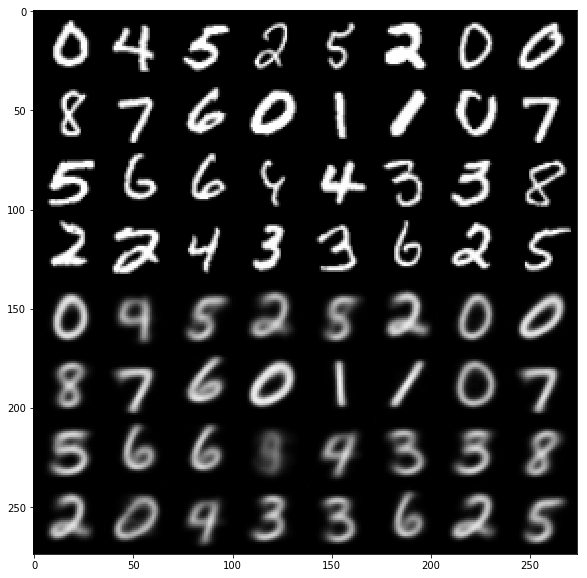

In [4]:
# Plot reconstructions
%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10, 10)) 
# Get a batch of data
for batch, labels in test_loader:
    break
    
#get best model,easrly stopping

viz = Visualizer(model)

# Reconstruct data using Joint-VAE model
recon = viz.reconstructions(batch)

# face
# recon=np.rollaxis(recon.numpy(), 0, 3)  
# print(recon[265:,:,:].max())
# recon[:,:,:]=(recon[:,:,:]+1)/2
# plt.imshow(recon[:,:,:].astype(float))

#MNIST
plt.imshow(recon.numpy()[0, :, :].astype(float), cmap='gray')
#plt.savefig(path+"/recon.png")
print(recon.numpy()[0, :, :].max())



In [5]:
test_batch = iter(test_loader)
test_batch = next(test_batch)
latent_dist,mask,_ = model.encode(torch.tensor(test_batch[0]).cuda())

print(mask,len(torch.nonzero(mask[0]==0)))

# for latent in latent_dist['cont'][0]:
#     count=torch.zeros((1,32))
#     latent[latent<1e-7]=0
    
#     for i in range(128):
    
#     #print(latent[i].size(),torch.nonzero(latent[i]))#len(torch.nonzero(latent[0]==0))
#         count[latent[i].reshape(1,32)!=0] += 1
#     print(count)
def show_idx(mask):
    a = mask.cpu().detach().numpy().squeeze()
    return np.array(np.where(a==1))+1
    

tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]], device='cuda:0',
       grad_fn=<ViewBackward>) 61


/data/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  app.launch_new_instance()
/data/anaconda/envs/py35/lib/python3.5/site-packages/torch/nn/functional.py:1332: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


In [6]:
def TCR():
    totalc = 0
    for batch, labels in test_loader:
        latent_dist, mask, reg = model.encode(torch.tensor(batch).cuda())
        mean, var = latent_dist['cont'][0]
        cov = covmatrix(mean)
        cov[torch.abs(cov)<=1e-6]=0
        cor = cov2cor(cov)
        totalc += np.sum(cor) 

    return totalc/len(test_loader)

def TCV():
    totalc = 0
    for batch, labels in test_loader:
        latent_dist,mask, reg = model.encode(torch.tensor(batch).cuda())
        mean, var = latent_dist['cont'][0]
        cov = covmatrix(mean).cpu().detach().numpy()
        cov = cov-np.diag(np.diag(cov))
        totalc += np.sum(cov**2) 
        
    return totalc/len(test_loader)


def covmatrix(mean):
    exp_mu = torch.mean(mean, dim=0)  #####mean through batch

    # expectation of mu mu.tranpose
    mu_expand1 = mean.unsqueeze(1)  #####(batch_size, 1, number of mean of latent variables)
    mu_expand2 = mean.unsqueeze(2)  #####(batch_size, number of mean of latent variables, 1) ignore batch_size, only transpose the means
    exp_mu_mu_t = torch.mean(mu_expand1 * mu_expand2, dim=0)

    # covariance of model mean
    cov = exp_mu_mu_t - exp_mu.unsqueeze(0) * exp_mu.unsqueeze(1) 
    return cov
def cov2cor(c):
    #input batch * n_cont
    c = c.cpu().detach()
    d=np.zeros_like(c)
    for i in range(c.shape[0]):
        for j in range(c.shape[1]):
            d[i,j]=c[i,j]/(np.sqrt(c[i,i]*c[j,j]+1e-10))
    return d
tcor=TCR()
tcov=TCV()
print(tcor,tcov)
trainer.evaluate(test_loader)

/data/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/data/anaconda/envs/py35/lib/python3.5/site-packages/torch/nn/functional.py:1332: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
/data/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:16: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


3.0338423054689057 0.02551133175985591
Valid Loss: 41.513, Recon Error: 0.039


(41.51250047137024, tensor(0.0389, device='cuda:0', grad_fn=<DivBackward0>))

/data/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/data/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/data/anaconda/envs/py35/lib/python3.5/site-packages/torch/nn/functional.py:1332: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


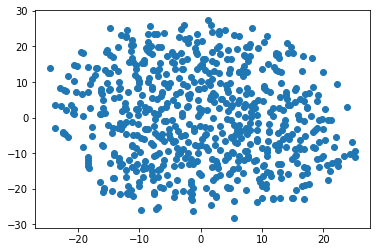

In [7]:
###latent space T-SNE visualization
from sklearn.manifold import TSNE
import numpy as np

samples = torch.zeros(1)
labels = torch.zeros(1)
for i in range(10):
    test_batch = iter(test_loader)
    test_batch = next(test_batch)
    new_labels =torch.tensor(test_batch[1])
    latent_dist,_ ,_= model.encode(torch.tensor(test_batch[0]).cuda())
    new_samples = model.reparameterize(latent_dist)
    if torch.sum(samples) == 0:
        samples =new_samples
        labels = new_labels
    else:
        samples = torch.cat((samples,new_samples),0)
        labels = torch.cat((labels, new_labels),0)
    #print(samples.shape)
    
##latent_varibales should be N,D--->N,2


# latent_variables = samples.reshape(samples[0],-1)
tsne = TSNE(n_components=2)

tsne.fit_transform(samples.detach().cpu().numpy())

plt.scatter(tsne.embedding_[:,0],tsne.embedding_[:,1])
#plt.imshow()

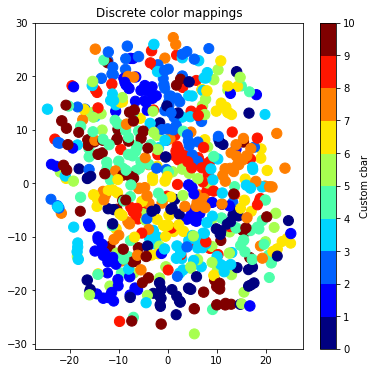

In [8]:
# import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt


N = 10 # Number of labels

# setup the plot
fig, ax = plt.subplots(1,1, figsize=(6,6))
# define the data
x = tsne.embedding_[:,0]
y = tsne.embedding_[:,1]
tag = labels# Tag each point with a corresponding label    

# define the colormap
cmap = plt.cm.jet
# extract all colors from the .jet map
cmaplist = [cmap(i) for i in range(cmap.N)]
# create the new map
cmap = cmap.from_list('Custom cmap', cmaplist, cmap.N)

# define the bins and normalize
bounds = np.linspace(0,N,N+1)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

# make the scatter
scat = ax.scatter(x,y,c=tag,s=np.random.randint(100,110,N),cmap=cmap,     norm=norm)
# create the colorbar
cb = plt.colorbar(scat, spacing='proportional',ticks=bounds)
cb.set_label('Custom cbar')
ax.set_title('Discrete color mappings')
if not os.path.exists(path):
    os.makedirs(path)
plt.savefig(path+"/scatter.png")
plt.show()




t-SNE demo
import numpy as np
from sklearn.manifold import TSNE
X = np.arange(40).reshape(5,4,2)

X_new = X.reshape(5,-1)
#X = np.array([[[0,0], [0,0], [0,0]], [[0,0], [0,1], [1,1]], [[1,1], [1,0], [0,1]], [[1,1], [1,1], [1,1]]])
print(X.shape,X)
print("--------")
print(X_new)

tsne = TSNE(n_components=2)
tsne.fit_transform(X)
print(tsne.embedding_)

# Plot samples

samples = viz.samples()
plt.imshow(samples.numpy()[0, :174, :], cmap='gray')
print(np.sum(samples.numpy()[0, :174, :]))
print(samples.numpy()[0, :, :].shape)
####origin
4*28

0.5


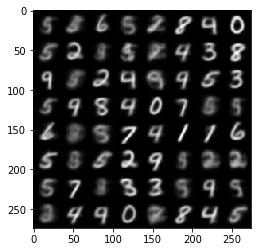

In [9]:
# Plot samples
import matplotlib as mpl

#MNIST
samples = viz.samples()
sample=samples.numpy()[0, :, :]/2+0.5
plt.imshow(sample, cmap='gray')
plt.imsave(path+"/samples",samples.numpy()[0, :, :]/2+0.5, cmap='gray')

print((sample).min())

# face
# fig = plt.figure(figsize=(50, 50)) 
# samples = viz.samples()
# samples = np.rollaxis(samples.numpy(), 0, 3)  
# print(samples[:,:,0].max())
# samples=(samples+1)/2
# plt.imshow(samples.astype(float),norm = norm)
# plt.imsave(path+"/samples",samples)
###DIP

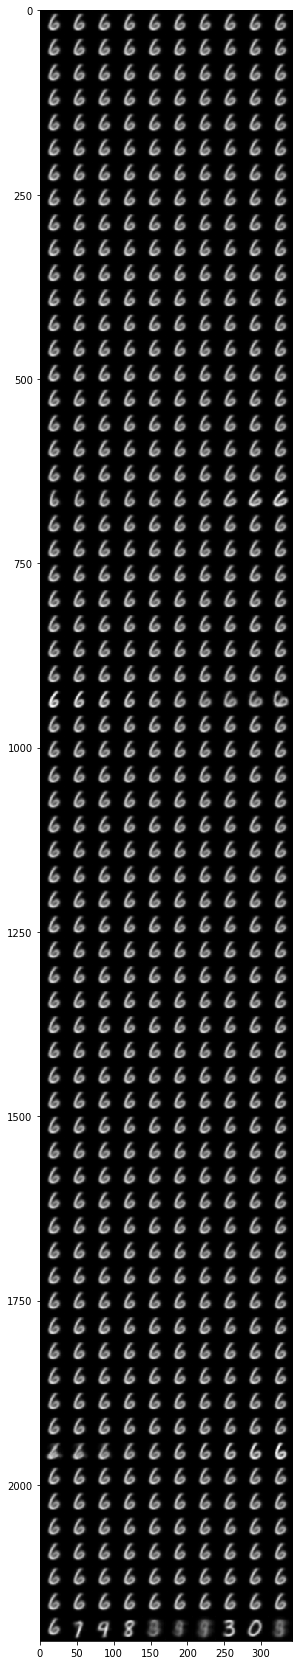

In [10]:
# Plot all traversals
fig = plt.figure(figsize=(30, 30))
traversals = viz.all_latent_traversals(size=10)

#MNIST
plt.imshow(traversals.numpy()[0, :, :], cmap='gray')
plt.imsave(path+"/all_traversals",traversals.numpy()[0, :, :], cmap='gray')

#face
# traversals = np.rollaxis(traversals.numpy(), 0, 3)  
# traversals=(traversals+1)/2
# plt.imshow(traversals)
# plt.imsave(path+"/all_traversals",traversals)
###dip[0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1.,
#         0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0.]

array([[20, 28, 58]])

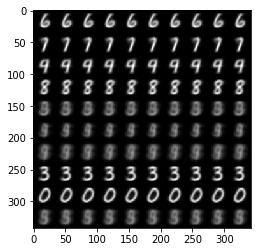

In [11]:
# Plot a grid of some traversals
traversals = viz.latent_traversal_grid(cont_idx=5, cont_axis=1, disc_idx=0, disc_axis=0, size=(10, 10))
#MNIST
plt.imshow(traversals.numpy()[0, :, :], cmap='gray')
plt.imsave(path+"/contVSdisc",traversals.numpy()[0, :, :], cmap='gray')

traversals.numpy()[0, :, :].max()
show_idx(mask)
#face
# traversals = np.rollaxis(traversals.numpy(), 0, 3)
# traversals=(traversals+1)/2
# plt.imshow(traversals)
# plt.imsave(path+"/contVSdisc",traversals)
##origin

all_t = viz.all_latent_traversals()
print(all_t.shape)
plt.imshow(all_t.numpy()[0, :, :], cmap='gray')
plt.imsave("figures/beta/all_",traversals.numpy()[0, :, :], cmap='gray')

continuous


array([[20, 28, 58]])

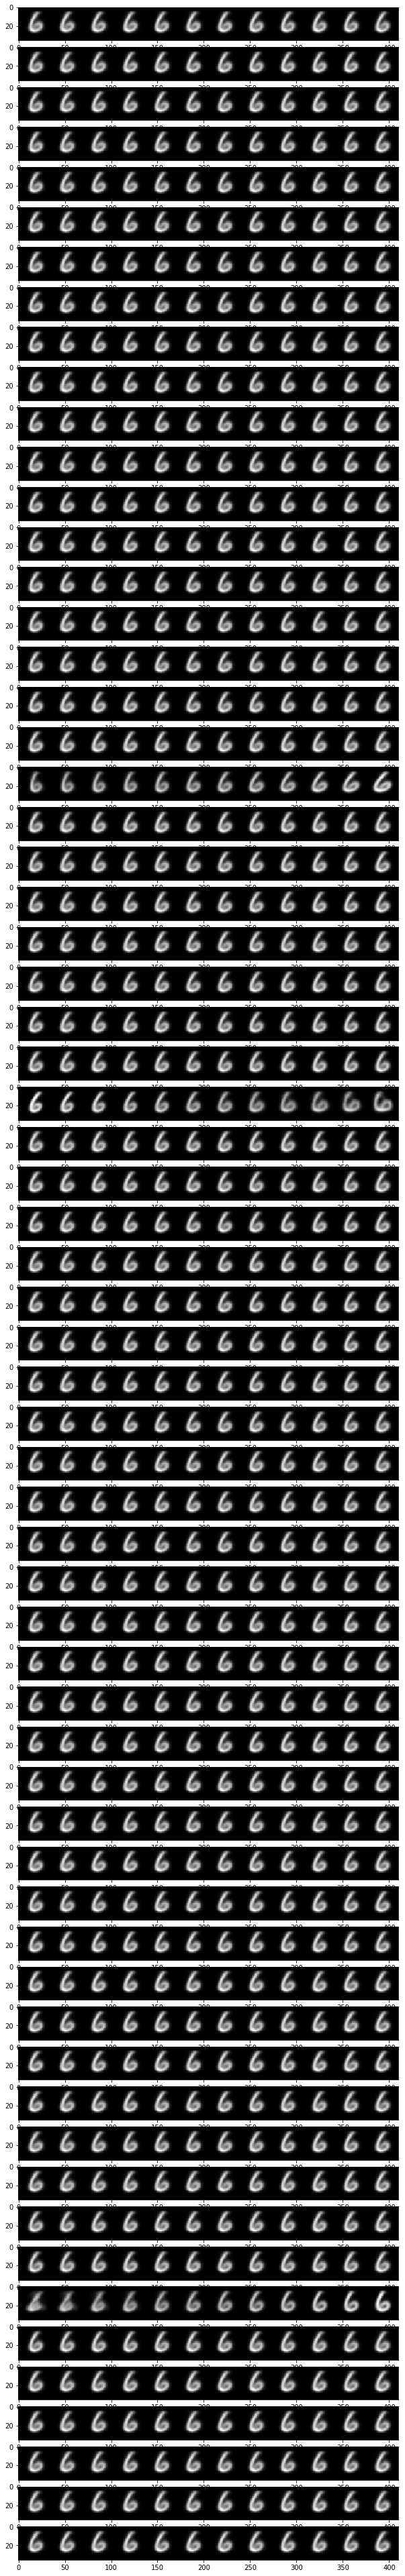

In [12]:
%matplotlib inline
import torch
import numpy as np
# Plot a grid of some traversals

fig = plt.figure(figsize=(70, 70))  # width, height in inches
print("continuous")
for i in range(n_cont):
    traversals = viz.latent_traversal_line(cont_idx=i, disc_idx=None,size=12)
    
    #MNIST
    sub = fig.add_subplot(n_cont, 1, i + 1)
    plt.savefig(path+"/cont{}.png".format(i))
    plt.imshow(traversals.numpy()[0, :, :], cmap='gray')
    
    #FACE
#     traversals = np.rollaxis(traversals.numpy(), 0, 3)
#     sub = fig.add_subplot(n_cont, 1, i + 1)
#     traversals=(traversals+1)/2
#     plt.imshow(traversals)   
plt.savefig(path+"/cont.png")

show_idx(mask)
    

discrete


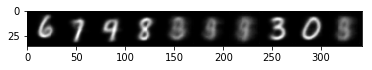

In [13]:
print("discrete")
for i in range(n_disc):
    traversals = viz.latent_traversal_line(cont_idx=None, disc_idx=i,size=10)
    ##MNIST
    sub = fig.add_subplot(n_disc, 1, i + 1)
    plt.savefig(path+"/disc{}.png".format(i))
    plt.imshow(traversals.numpy()[0, :, :], cmap='gray')

    #FACE
#     traversals = np.rollaxis(traversals.numpy(), 0, 3)
#     sub = fig.add_subplot(n_disc, 1, i + 1)
# traversals=(traversals+1)/2
# plt.savefig(path+"/disc{}.png".format(i))
# plt.imshow(traversals)

In [14]:
import numpy as np
import torch
from latent_traversals import LatentTraverser
from scipy import stats
from torch.autograd import Variable
from torchvision.utils import make_grid, save_image
import numpy as np
import torch
from latent_traversals import LatentTraverser
from scipy import stats
from torch.autograd import Variable
from torchvision.utils import make_grid, save_image

    
# face    
# def single_traversal(model,n_cont,cont_idx,cont_v,disc,disc_idx,prior):

#         # Generate latent traversal
# #         latent_samples = latent_traverser.traverse_line(cont_idx=cont_idx,
# #                                                              disc_idx=disc_idx,
# #                                                              size=size)
#         dim = n_cont + sum(disc)
#         if prior:
#             latent_samples = torch.tensor(np.random.normal(size=(1, dim)))
#         else:
#             latent_samples= torch.zeros((1,dim))
            
#         latent_samples[:,disc_idx+n_cont-1] = 1.0
#         latent_samples[:,cont_idx]=cont_v
        

#         # Map samples through decoder
#         generated = decode_latents(model, latent_samples.float()).squeeze()
#         generated  = np.rollaxis(generated.detach().numpy(), 0, 3)
#         generated = (generated +1)/2
#         print(generated.min(),generated.max())
#         plt.imshow(generated)

        
# def decode_latents(model, latent_samples):

#         latent_samples = Variable(latent_samples)
#         if model.use_cuda:
#             latent_samples = latent_samples.cuda()
#             result = model.decode(latent_samples).cpu()
#         return result

#MNIST
def single_traversal(model,n_cont,cont_idx,cont_v,disc,disc_idx,prior):

        # Generate latent traversal
#         latent_samples = latent_traverser.traverse_line(cont_idx=cont_idx,
#                                                              disc_idx=disc_idx,
#                                                              size=size)
        dim = n_cont + sum(disc)
        if prior:
            latent_samples = torch.tensor(np.random.normal(size=(1, dim)))
        else:
            latent_samples= torch.zeros((1,dim))
            
        latent_samples[:,disc_idx+n_cont-1] = 1.0
        latent_samples[:,cont_idx]=cont_v
        

        # Map samples through decoder
        generated = decode_latents(model, latent_samples.float()).squeeze()
        plt.imshow(generated.detach().numpy(),cmap="gray")

        
def decode_latents(model, latent_samples):

        latent_samples = Variable(latent_samples)
        if model.use_cuda:
            latent_samples = latent_samples.cuda()
        return model.decode(latent_samples).cpu()

In [15]:
from ipywidgets import interact, fixed
from IPython.display import display
def interactive_view(model,n_cont,disc):
    
    
    interact(single_traversal,model=fixed(model),
             n_cont=fixed(n_cont), cont_idx=(0,n_cont,1), cont_v=(-2.5,2.5,0.5),
             disc=fixed(disc),disc_idx=(0,9,1),
             prior=True);
             
interactive_view(model,n_cont,disc)
show_idx(mask)

interactive(children=(IntSlider(value=32, description='cont_idx', max=64), FloatSlider(value=0.0, description=…

array([[20, 28, 58]])